## 손으로 짜는 선형회귀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# 데이터를 생성하고 반환하는 함수 구현
def load_data():
    X = np.array([[8.70153760], [3.90825773], [1.89362433], [3.28730045], [7.39333004], [2.98984649], [2.25757240], [9.84450732], 
                  [9.94589513], [5.48321616]])
    y = np.array([[5.64413093], [3.75876583], [3.87233310], [4.40990425], [6.43845020], [4.02827829], [2.26105955], [7.15768995], [6.29097441], [5.19692852]])
    #X = 2*np.random.rand(100,1)
    #y = 6 +4*X+np.random.rand(100,1)
    return X, y

"""
1. 입력값(X)와 beta_0, beta_1를 바탕으로
   예측값(pre_y)을 계산하여 반환하는 함수를 구현합니다.
   
   회귀 함수식을 참고하여
   예측값을 계산합니다.
   y = beta_0 + beta_1 * x
"""
def prediction(beta_0, beta_1, X):
    pred_y = beta_0 + beta_1 * X
    return pred_y

# beta_0와 beta_1 값을 업데이트 하는 규칙을 정의하는 함수 구현
def update_beta(beta_0, beta_1, X, loss, lr):
    #print(len(loss))
    delta_0 = -(lr*(2/len(loss))*(np.dot(X.T,loss)))
    delta_1 = -(lr*(2/len(loss))*np.sum(loss))
    #print('delta_0: ',delta_0.shape)
    #print('delta_1: ',delta_1.shape)
    return delta_0, delta_1


# 그래프를 시각화하는 함수구현
def plotting_graph(X,y,beta_0, beta_1):
    y_pred = beta_0 + beta_1[0,0] * X
    
    fig =plt.figure()
    
    plt.scatter(X,y)
    plt.plot(X,y_pred,c='r')
    plt.show()

"""
2. 반복 횟수만큼 오차(loss)를 계산하고
beta_0, beta_1의 값을 변경하는 함수를 구현합니다.

Step01. 실제 값 y와 prediction함수를 통해 예측한 예측 값 
        pred_y간의 차이(loss)를 계산합니다.
        
        loss는 실제값(y) - 예측값(pred_y)으로 정의하겠습니다.
        
Step02. 구현된 함수를 이용하여
        beta_0와 beta_1의 변화값을 각각 beta0_delta, beta1_delta에 저장합니다.
"""
def gradient_descent(X, y, iters,lr):
    beta_0 = np.zeros((1,1))
    beta_1 = np.zeros((1,1))
    
    for i in range(iters):
        loss = y - prediction(beta_0, beta_1, X)
        
        beta0_delta, beta1_delta = update_beta(beta_0, beta_1,X,loss,lr)
        beta_0 -= beta0_delta
        beta_1 -= beta1_delta
        
        # 100번의 학습마다 그래프 출력하기
        if i%100 == 0:
            print("학습 횟수: ", i)
            plotting_graph(X,y,beta_0, beta_1)
    return beta_0, beta_1   

학습 횟수:  0


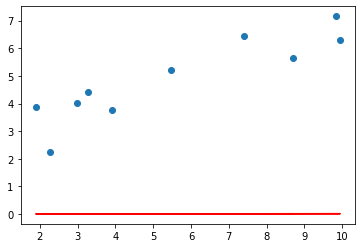

학습 횟수:  100


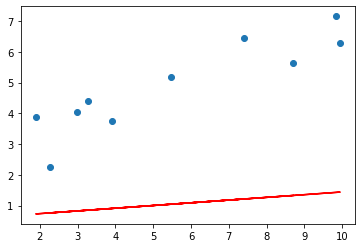

학습 횟수:  200


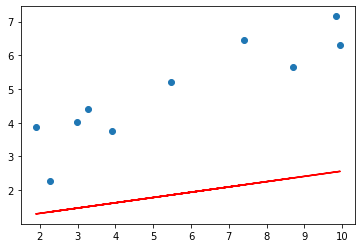

학습 횟수:  300


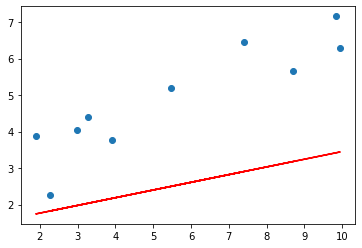

학습 횟수:  400


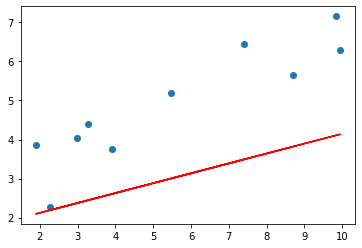

학습 횟수:  500


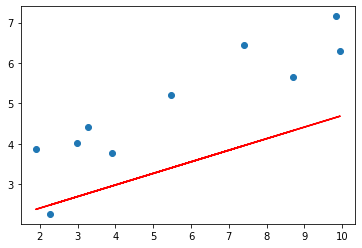

학습 횟수:  600


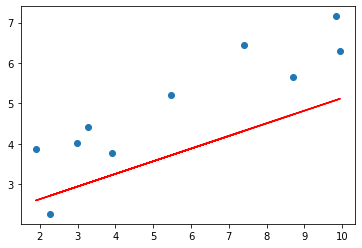

학습 횟수:  700


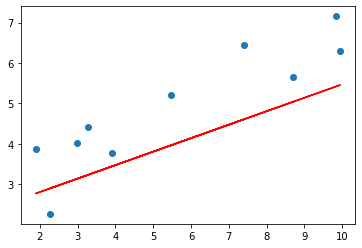

학습 횟수:  800


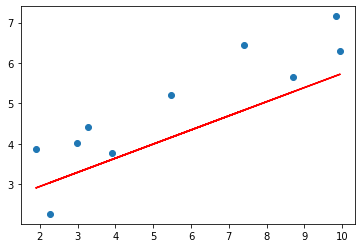

학습 횟수:  900


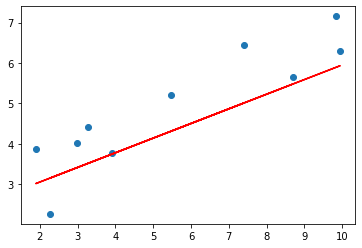

학습 횟수:  1000


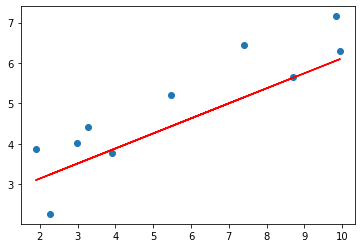

학습 횟수:  1100


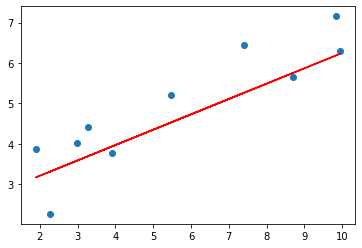

1200번의 학습 이후의 회귀 알고리즘 결과
beta_0:  [2.48690272] beta_1:  [0.38637894]


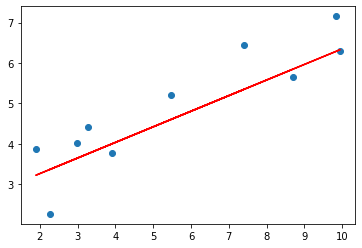

(array([[2.48690272]]), array([[0.38637894]]))

In [3]:
# 회귀 알고리즘 구현 진행 함수 구현
# y = beta0 + beta_1 * x
def main():
    
    # 학습을 위해 필요한 파라미터입니다.
    lr =  1e-4
    iteration = 1200
    
    X,y = load_data()
    #print(X.shape, y.shape)
    beta_0, beta_1 = gradient_descent(X,y, iteration, lr)
    print("{}번의 학습 이후의 회귀 알고리즘 결과".format(iteration))
    print("beta_0: ", beta_0[0], "beta_1: ", beta_1[0])
    
    plotting_graph(X,y,beta_0, beta_1)
    
    return beta_0, beta_1
    
main()

### scikit learn 모듈을 사용한 선형회귀

> beta_0 :  [2.89804615]
> beta_1 :  [[2.90298892]]
> 모델 평가 점수 : 0.8948735905242706


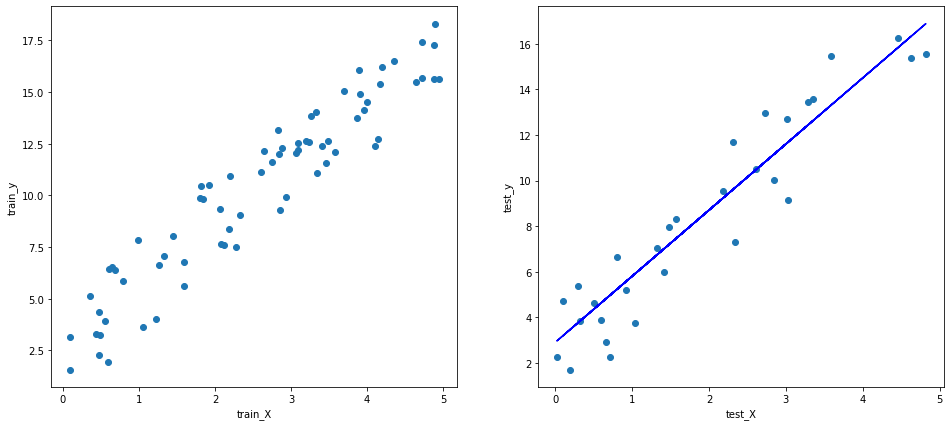

In [4]:
#데이터를 분리하는 모듈을 불러옵니다.
from sklearn.model_selection import train_test_split

# 사이킷런에 구현되어 있는 회귀 모델을 불러옵니다.
# 사이킷런은 머신러닝 모델 구현 뿐만 아니라 예시
# 데이터 셋, 데이터 전처리, 세부 조정, 모델 평가 등과
# 같은 유용한 기능들을 제공한다.
from sklearn.linear_model import LinearRegression

"""
1. 데이터를 생성하고
   생성한 데이터를 
   학습용 데이터와 테스트용 데이터로 분리하여
   반환하는 함수를 구현합니다.
   
   학습용 데이터로 전체 데이터의 70%를 사용하고
   테스트용 데이터로 나머지 30%를 사용합니다.
   
   동일한 결과 확인을 위하여 random_state를 0으로 설정합니다.
"""
def load_data():
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=0)
    
    return train_X, test_X, train_y, test_y

"""
2. 단순 선형회귀 모델을 불러오고,
   불러온 모델을 학습용 데이터에
   맞추어 학습시킨 후
   테스트 데이터에 대한
   예측값을 반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 구현되어 있는 
           단순 선형회귀 모델을 불러옵니다.
           
   Step02. 불러온 모델을 
           학습용 데이터에 맞춰 학습시킵니다.
"""
def regression_model(train_X, train_y):
    
    simplelinear = LinearRegression()   
    simplelinear.fit(train_X, train_y)
    return simplelinear

# 그래프를 시각화하는 함수입니다.
def plotting_graph(train_X, test_X, train_y, test_y, predicted):
    fig, ax = plt.subplots(1,2, figsize=(16, 7))
    
    ax[0].scatter(train_X,train_y)
    ax[1].scatter(test_X,test_y)
    ax[1].plot(test_X, predicted, color='b')
    
    ax[0].set_xlabel('train_X')
    ax[0].set_ylabel('train_y')
    ax[1].set_xlabel('test_X')
    ax[1].set_ylabel('test_y')
    
"""
3. 모델 학습 및 예측 결과 확인을 위한 
   main() 함수를 완성합니다.
   
   Step01. 학습이 완료된 모델을 활용하여 
           테스트 데이터에 대한 예측을 수행합니다.
        
   Step02. 사이킷런 회귀 모델 내에 구현되어 있는 
           score 함수를 사용하여 
           모델 학습 평가 점수를 model_score 변수에
           저장합니다. 
   
   Step03. 학습된 모델의 beta_0와 beta_1을 
           각각 변수 beta_0와 beta_1에 
           저장합니다.
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    simplelinear = regression_model(train_X, train_y)
    
    predicted = simplelinear.predict(test_X)
    
    model_score = simplelinear.score(test_X, test_y)

    
    beta_0 = simplelinear.intercept_
    beta_1 = simplelinear.coef_
    
    print("> beta_0 : ",beta_0)
    print("> beta_1 : ",beta_1)
    
    print("> 모델 평가 점수 :", model_score)
    
    # 시각화 함수 호출하기
    plotting_graph(train_X, test_X, train_y, test_y, predicted)
    
    #return predicted, beta_0, beta_1, model_score
main()

### scikit learn 모듈을 사용한 다중회귀

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

def load_data():
    X, y = load_boston(return_X_y = True)
    
    train_X , test_X , train_y, test_y = train_test_split(X,y,
       test_size = 0.2, random_state = 100)
    
    return train_X , test_X , train_y, test_y

def Multi_Regression(train_X,train_y):
    multilinear = LinearRegression()
    multilinear.fit(train_X,train_y)
    return multilinear

def main():
    train_X, test_X, train_y, test_y = load_data()
    print("train_X : ", train_X.shape)
    
    multilinear = Multi_Regression(train_X,train_y)
    predicted = multilinear.predict(test_X)
    
    model_score = multilinear.score(test_X, test_y)
    
    print("\n모델평가 점수",model_score)
    beta_0 = multilinear.intercept_
    beta_i_list = multilinear.coef_
    
    print("\n>beta_0:", beta_0)
    print("\n>beta_i_list: ", beta_i_list)
    
    return

In [6]:
main()

train_X :  (404, 13)

모델평가 점수 0.7555033086871306

>beta_0: 36.33377028550793

>beta_i_list:  [-8.14896492e-02  4.80407782e-02 -5.47150249e-03  3.06260576e+00
 -1.61368815e+01  3.67245067e+00 -8.51525259e-03 -1.51740854e+00
  2.87271007e-01 -1.21207598e-02 -9.24160757e-01  9.53460812e-03
 -4.85895548e-01]


C:\ProgramData\Anaconda3\envs\DataScience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

### PolynomialFeatures

(50, 3)
번환 이후 X 데이터 
 [[ 1.          2.64644051  7.00364738]
 [ 1.          3.1455681   9.89459867]
 [ 1.          2.80829013  7.88649344]
 [ 1.          2.63464955  6.94137825]
 [ 1.          2.2709644   5.1572793 ]
 [ 1.          2.93768234  8.62997753]
 [ 1.          2.31276163  5.34886637]
 [ 1.          3.675319   13.50796977]
 [ 1.          3.89098828 15.13978981]
 [ 1.          2.15032456  4.6238957 ]
 [ 1.          3.37517511 11.39180705]
 [ 1.          2.58668476  6.69093804]
 [ 1.          2.70413368  7.31233898]
 [ 1.          3.77678991 14.26414206]
 [ 1.          1.21310817  1.47163144]
 [ 1.          1.2613879   1.59109943]
 [ 1.          1.06065519  1.12498944]
 [ 1.          3.49785954 12.23502134]
 [ 1.          3.33447025 11.11869187]
 [ 1.          3.61003644 13.03236313]
 [ 1.          3.93585503 15.49095479]
 [ 1.          3.39747569 11.54284108]
 [ 1.          2.38443809  5.68554499]
 [ 1.          3.34158753 11.16620721]
 [ 1.          1.35482328  1.83554611]
 [ 

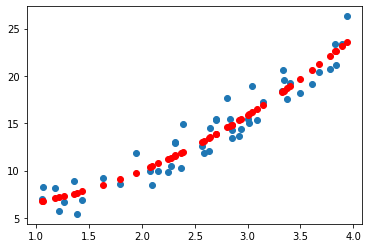

In [7]:
from sklearn.preprocessing import PolynomialFeatures

def load_data():
    np.random.seed(0)
    X = 3*np.random.rand(50,1) + 1
    y = X**2 + X +2 + 5*np.random.rand(50,1)
    return X,y

def Polynomial_transform(X):
    poly_feat = PolynomialFeatures(degree=2, include_bias = True)
    poly_X = poly_feat.fit_transform(X)
    print(poly_X.shape)
    print("번환 이후 X 데이터 \n", poly_X)
    return poly_X
    
def Multi_Regression(poly_x,y):
    multilinear = LinearRegression()
    multilinear.fit(poly_x,y)
    return multilinear

def plotting_graph(X,y,predicted):
    fig = plt.figure()
    plt.scatter(X,y)
    plt.scatter(X,predicted,c='r')
    plt.show()
    
def main():
    X,y = load_data()
    poly_x = Polynomial_transform(X)
    linear_model = Multi_Regression(poly_x,y)
    predicted = linear_model.predict(poly_x)
    plotting_graph(X,y,predicted)
    
main()

In [8]:
# 교차 검증 KFold 구현
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

# sklearn의 KFold 모듈 불러오기
from sklearn.model_selection import KFold


"""
1. 사이킷런에 존재하는 데이터를 불러오고, 
   불러온 데이터를 학습용 데이터와 테스트용 데이터로 
   분리하여 반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 존재하는 boston 데이터를 
           (X, y)의 형태로 불러옵니다. 
   
   Step02. 불러온 데이터를 
           학습용 데이터와 테스트용 데이터로
           분리합니다.
           
           학습용 데이터로 전체 데이터의 80%를,
           테스트용 데이터로 나머지 20%를 사용합니다.
           
           동일한 결과 확인을 위하여 random_state를
           100으로 설정합니다.
"""

def load_data():
    
    X, y = load_boston(return_X_y = True)
    train_X , test_X , train_y, test_y = train_test_split(X,y,
       test_size = 0.2, random_state = 100)
    
    return train_X , test_X , train_y, test_y

"""
2. K-fold 교차 검증을 통한 
   모델 학습 및 예측 수행을 진행할 함수를 구현합니다.
   
   Step01. 전체 데이터를 5개로 분리할 수 있도록 
           KFold 객체를 정의합니다.
           
   Step02. 정의한 kFold 객체와 .split() 함수를 이용하여 
           학습용 데이터 내에서 다시 
           학습용(Train) 데이터와 검증용(Validation)
           데이터를 나누어 
           각각 X_train, X_val,y_train, y_val에
           저장합니다.
           
           train_idx 와 val_idx는 분리된 데이터들의
           인덱스입니다.
            
   Step03. 분리한 학습용 데이터로 모델을 학습시키고,
           검증용 데이터로 모델을 평가하여 
           각 데이터에 대한 모델 평가 점수를 score
           변수에 저장합니다.
"""
def kfold_regression(train_X, train_y):
    model = LinearRegression()
    
    # 반복문 내에서 횟수를 표시하기 위한 변수 설정하기
    n_iter = 0 
    
    # 각 fold 마다 모델 검증 점수를 저장하기 위한 빈 리스트 생성하기
    model_scores = []
    
    kfold = KFold(n_splits=5)
    
    for train_idx, val_idx in kfold.split(train_X):
        
        X_train, X_val = train_X[train_idx], train_X[val_idx]
        y_train, y_val =  train_y[train_idx], train_y[val_idx]
        
        model.fit(X_train, y_train)
        
        # 각 Iter 별 모델 평가 점수 측정
        score = model.score(X_val, y_val)
        
        # 학습용 데이터의 크기를 저장합니다.
        train_size = X_train.shape[0]
        val_size = X_val.shape[0]
        print("Iter : {0} Cross-Validation Accuracy : {1}, Train Data 크기 : {2}, Validation Data 크기 : {3}"
              .format(n_iter, score, train_size, val_size))
        n_iter += 1
        
        # 전체 모델 점수를 저장하는 리스트에 추가하기
        model_scores.append(score)
    return kfold, model, model_scores

def main():
    
    # 학습용 데이터와 테스트 데이터 불러오기
    train_X , test_X , train_y, test_y = load_data()
    
    # KFold 교차 검증을 통한 학습 결과와 회귀 모델을 반환하는 함수 호출하기
    kfold, model, model_scores = kfold_regression(train_X, train_y)
    
    # 전체 성능 점수의 평균 점수 출력
    print("\n> 평균 검증 모델 점수 : ", np.mean(model_scores))
    
    # 테스트 데이터에 대한 모델 성능 점수 출력
    print("> 테스트 데이터 모델 점수 : ", model.score(test_X,test_y))
        
main()      
    

Iter : 0 Cross-Validation Accuracy : 0.6225277546797329, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 1 Cross-Validation Accuracy : 0.7158099616179285, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 2 Cross-Validation Accuracy : 0.7986314390280342, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 3 Cross-Validation Accuracy : 0.6952286567450783, Train Data 크기 : 323, Validation Data 크기 : 81
Iter : 4 Cross-Validation Accuracy : 0.700695753685302, Train Data 크기 : 324, Validation Data 크기 : 80

> 평균 검증 모델 점수 :  0.7065787131512152
> 테스트 데이터 모델 점수 :  0.7572608014205964


C:\ProgramData\Anaconda3\envs\DataScience\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 